### Imports

In [1]:
## Data structures
import pandas as pd

## Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from astropy.coordinates import SkyCoord
import astropy.units as u
from yellowbrick.classifier import ClassPredictionError

## Data processing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from collections import Counter

## Models

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# SVM
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

### Loading up the data

In [2]:
df = pd.read_csv("star_classification.csv")
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


### Missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


### Visualising celestial map

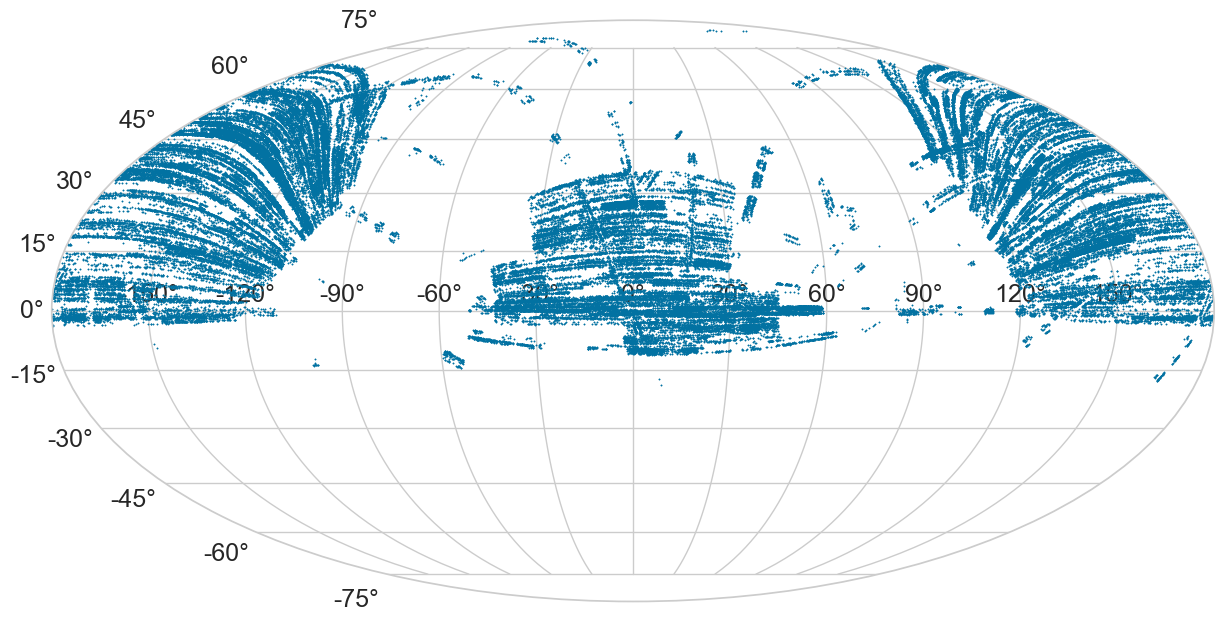

In [5]:
coords = SkyCoord(ra=df["alpha"] * u.degree, dec=df["delta"] * u.degree, frame="icrs")

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords.ra.wrap_at(180 * u.degree).radian, coords.dec.radian, s=1)

for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(18)

plt.show()

### Visualising the class count

In [6]:
fig = px.histogram(
    df, x="class", hover_data=df.columns, color="class", width=600, height=400
)

fig.show()

### Correlation

In [7]:
df["class"] = [0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]
corr = df.corr()
px.imshow(
    corr,
    width=500,
)

### Feature selection

In [8]:
print(corr["class"].sort_values())

field_ID      -0.038044
u             -0.017701
g             -0.005915
run_ID        -0.000049
obj_ID        -0.000047
alpha          0.004552
cam_col        0.014476
z              0.017352
fiber_ID       0.032053
delta          0.056643
r              0.150691
MJD            0.207262
spec_obj_ID    0.215722
plate          0.215722
i              0.284396
redshift       0.536822
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64


In [9]:
df.drop(
    [
        "field_ID",
        "run_ID",
        "obj_ID",
        "alpha",
        "fiber_ID",
        "cam_col",
        "delta",
        "rerun_ID",
        "spec_obj_ID",
        "plate",
        "MJD",
    ],
    axis=1,
    inplace=True,
)

### Outlier deletion

In [10]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [11]:
outliers_count = 0
for ft in ["g", "u", "r", "i", "z", "redshift"]:
    outliers_list = outliers(df, ft)
    outliers_count = len(outliers_list)
    df.drop(outliers_list, inplace=True)
print(outliers_count)
df.describe().T

8992


,count,mean,std,min,25%,50%,75%,max
u,90600.0,22.122940,2.292251,15.358420,20.279778,22.283920,23.797950,28.618680
g,90600.0,20.610919,2.079669,14.318450,18.782877,21.101585,22.194750,26.817360
r,90600.0,19.548934,1.854225,13.990440,17.908797,19.993675,20.961278,25.377300
i,90600.0,18.948135,1.716269,13.862170,17.515310,19.259345,20.176482,24.371220
z,90600.0,18.617960,1.709973,13.805350,17.269245,18.860795,19.724230,23.592280
class,90600.0,0.457494,0.684315,0.000000,0.000000,0.000000,1.000000,2.000000
redshift,90600.0,0.393636,0.387714,-0.009971,0.027621,0.344860,0.602142,1.676667


### Outliers after deletion

<Axes: xlabel='redshift'>

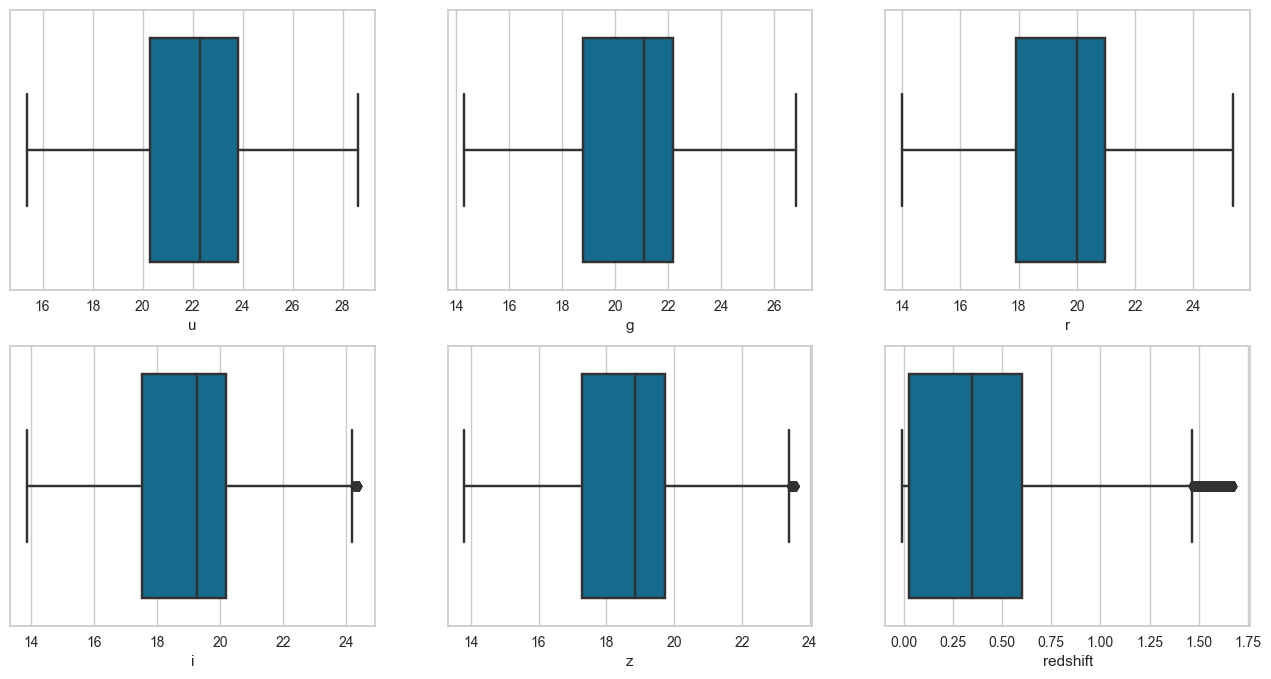

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

sns.boxplot(x="u", data=df, ax=axes[0][0])
sns.boxplot(x="g", data=df, ax=axes[0][1])
sns.boxplot(x="r", data=df, ax=axes[0][2])
sns.boxplot(x="i", data=df, ax=axes[1][0])
sns.boxplot(x="z", data=df, ax=axes[1][1])
sns.boxplot(x="redshift", data=df, hue="class", ax=axes[1][2])

### Distributions

<Axes: xlabel='redshift', ylabel='Count'>

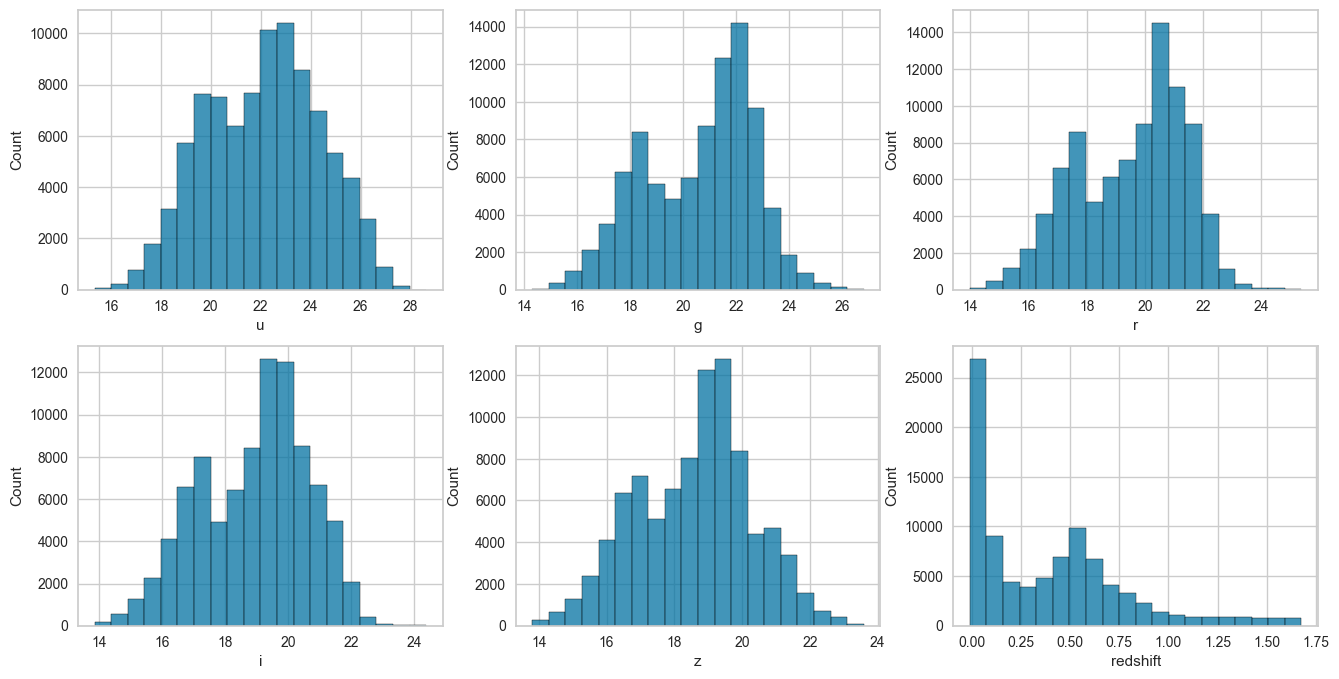

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

sns.histplot(data=df, x="u", ax=axes[0][0], bins=20)
sns.histplot(data=df, x="g", ax=axes[0][1], bins=20)
sns.histplot(data=df, x="r", ax=axes[0][2], bins=20)
sns.histplot(data=df, x="i", ax=axes[1][0], bins=20)
sns.histplot(data=df, x="z", ax=axes[1][1], bins=20)
sns.histplot(data=df, x="redshift", ax=axes[1][2], bins=20)

### Dependencies between data

<Axes: xlabel='class', ylabel='redshift'>

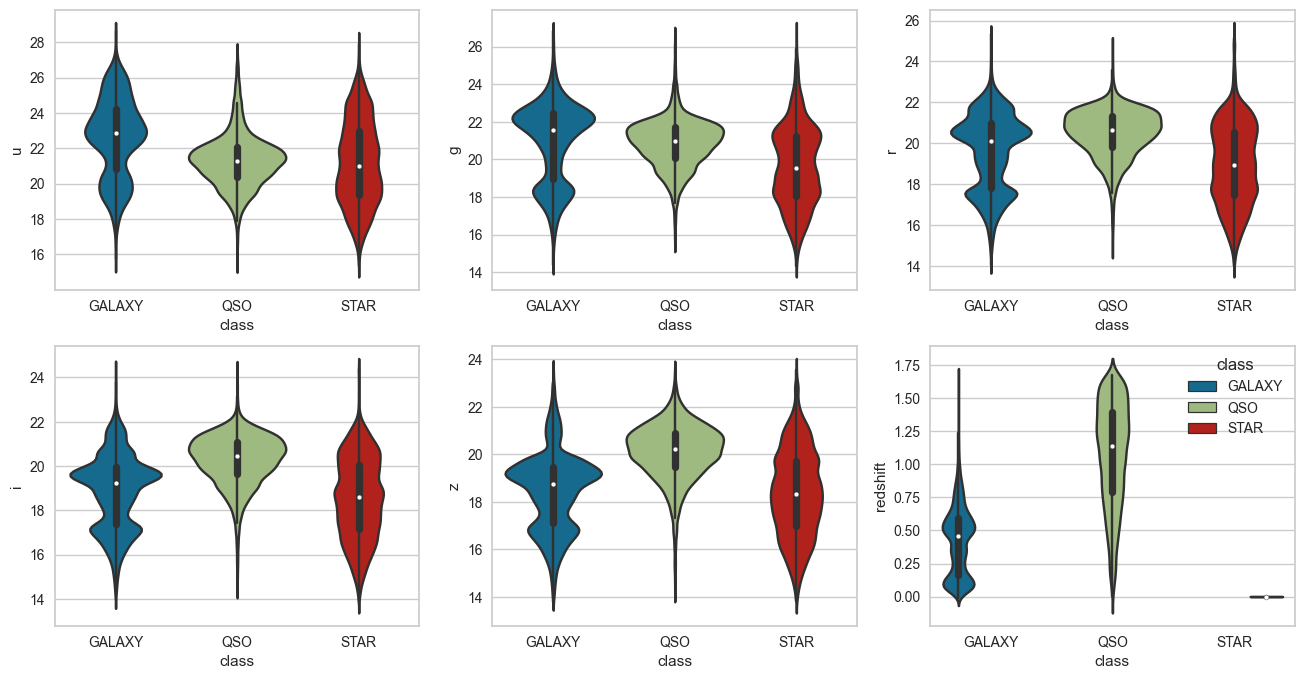

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

visualization_df = df.copy(True)
visualization_df["class"] = [
    "GALAXY" if i == 0 else "STAR" if i == 1 else "QSO" for i in df["class"]
]

sns.violinplot(x="class", y="u", data=visualization_df, ax=axes[0][0])
sns.violinplot(x="class", y="g", data=visualization_df, ax=axes[0][1])
sns.violinplot(x="class", y="r", data=visualization_df, ax=axes[0][2])
sns.violinplot(x="class", y="i", data=visualization_df, ax=axes[1][0])
sns.violinplot(x="class", y="z", data=visualization_df, ax=axes[1][1])
sns.violinplot(
    x="class", y="redshift", data=visualization_df, hue="class", ax=axes[1][2]
)

<Axes: xlabel='class', ylabel='redshift'>

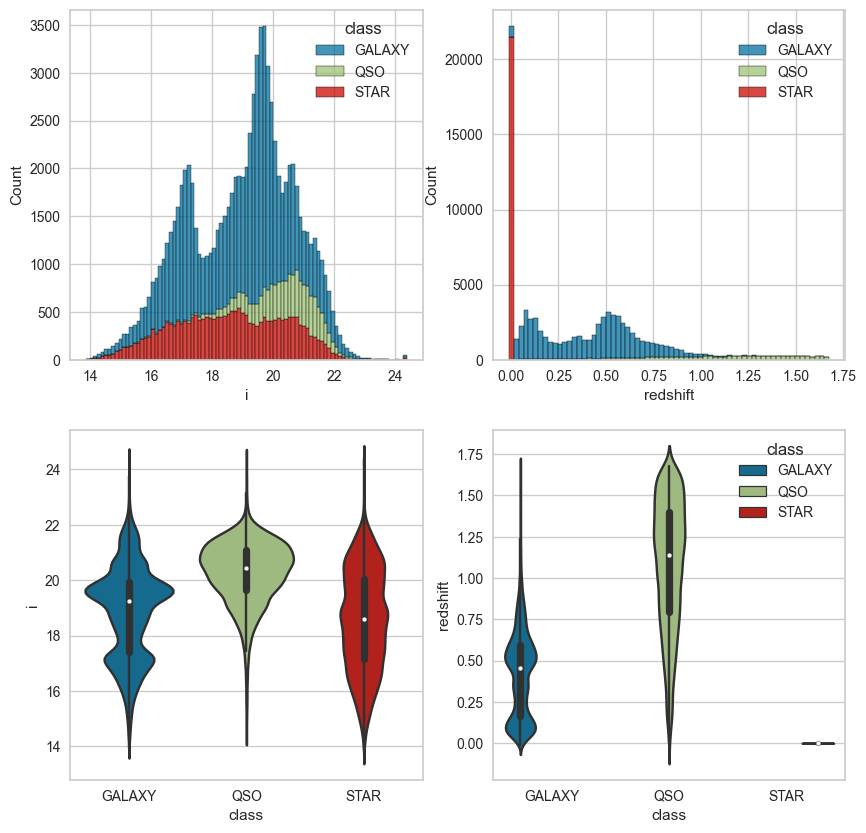

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(
    data=visualization_df,
    ax=axes[0][0],
    stat="count",
    x="i",
    kde=False,
    hue="class",
    multiple="stack",
    element="bars",
    legend=True,
)
sns.histplot(
    data=visualization_df,
    ax=axes[0][1],
    stat="count",
    x="redshift",
    kde=False,
    hue="class",
    multiple="stack",
    element="bars",
    legend=True,
)
sns.violinplot(x="class", y="i", data=visualization_df, ax=axes[1][0])
sns.violinplot(
    x="class", y="redshift", data=visualization_df, hue="class", ax=axes[1][1]
)

### Balancing dataset

##### Oversampling

In [16]:
ros = RandomOverSampler()
df_labels = df["class"].copy()
df.drop(labels=["class"], axis=1, inplace=True)
print(df)
df, df_labels = ros.fit_resample(df, df_labels)
print(Counter(df_labels))

              u         g         r         i         z  redshift
0      23.87882  22.27530  20.39501  19.16573  18.79371  0.634794
1      24.77759  22.83188  22.58444  21.16812  21.61427  0.779136
2      25.26307  22.66389  20.60976  19.34857  18.94827  0.644195
3      22.13682  23.77656  21.61162  20.50454  19.25010  0.932346
4      19.43718  17.58028  16.49747  15.97711  15.54461  0.116123
...         ...       ...       ...       ...       ...       ...
99995  22.16759  22.97586  21.90404  21.30548  20.73569  0.000000
99996  22.69118  22.38628  20.45003  19.75759  19.41526  0.404895
99997  21.16916  19.26997  18.20428  17.69034  17.35221  0.143366
99998  25.35039  21.63757  19.91386  19.07254  18.62482  0.455040
99999  22.62171  21.79745  20.60115  20.00959  19.28075  0.542944

[90600 rows x 6 columns]
Counter({0: 59121, 2: 59121, 1: 59121})


### Data Scaling

In [17]:
scaler = StandardScaler()
scaler.fit(df)
df_rf = df.copy()
df = scaler.transform(df)

<Axes: >

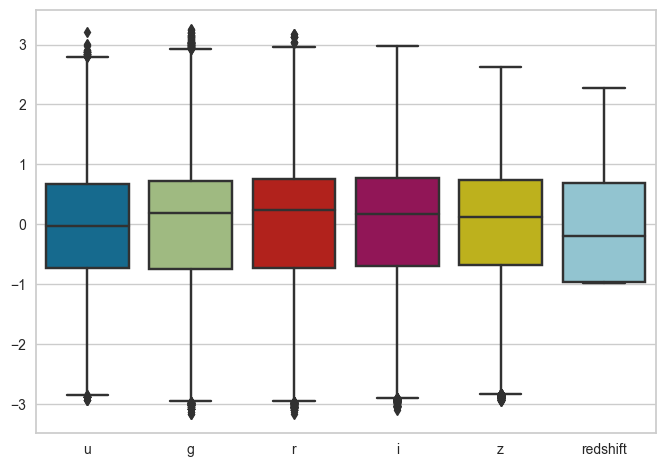

In [18]:
df_scaled = pd.DataFrame(df, columns=["u", "g", "r", "i", "z", "redshift"])
sns.boxplot(df_scaled)

### Splitting data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df, df_labels, test_size=0.2, random_state=42
)
print(f"Train {Counter(y_train)}")
print(f"Test {Counter(y_test)}")

Train Counter({0: 47390, 1: 47285, 2: 47215})
Test Counter({2: 11906, 1: 11836, 0: 11731})


### SVC

In [20]:
svm = SVC()

svm = svm.fit(X_train, y_train)

In [21]:
svm_pred = svm.predict(X_test)

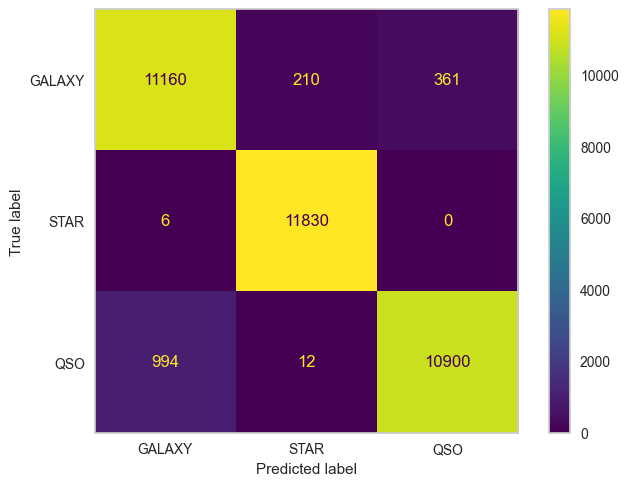

In [22]:
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=svm_conf_matrix, display_labels=["GALAXY", "STAR", "QSO"]
)
disp.plot()
plt.grid(False)
plt.show()

In [23]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11731
           1       0.98      1.00      0.99     11836
           2       0.97      0.92      0.94     11906

    accuracy                           0.96     35473
   macro avg       0.96      0.96      0.96     35473
weighted avg       0.96      0.96      0.96     35473



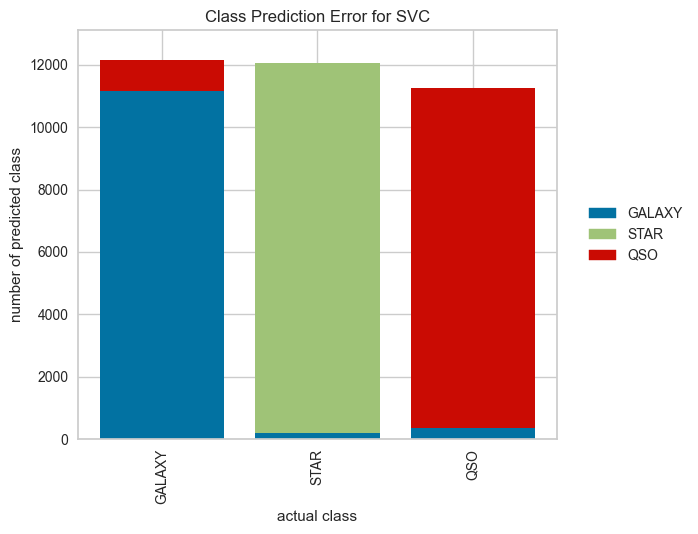

<Axes: title={'center': 'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [24]:
pred_error = ClassPredictionError(svm, classes=["GALAXY", "STAR", "QSO"])
pred_error.fit(X_train, y_train)
pred_error.score(X_test, y_test)
pred_error.show()

### Random Forest

In [25]:
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

In [26]:
rfc_pred = rfc.predict(X_test)

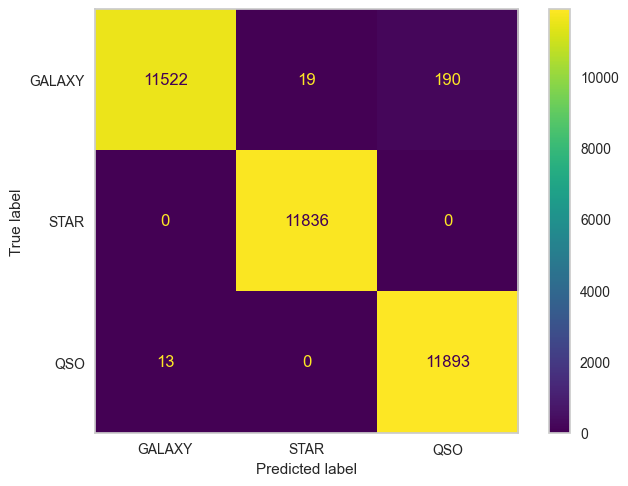

In [27]:
rfc_conf_matrix = confusion_matrix(y_test, rfc_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=rfc_conf_matrix, display_labels=["GALAXY", "STAR", "QSO"]
)
disp.plot()
plt.grid(False)
plt.show()

In [28]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11731
           1       1.00      1.00      1.00     11836
           2       0.98      1.00      0.99     11906

    accuracy                           0.99     35473
   macro avg       0.99      0.99      0.99     35473
weighted avg       0.99      0.99      0.99     35473



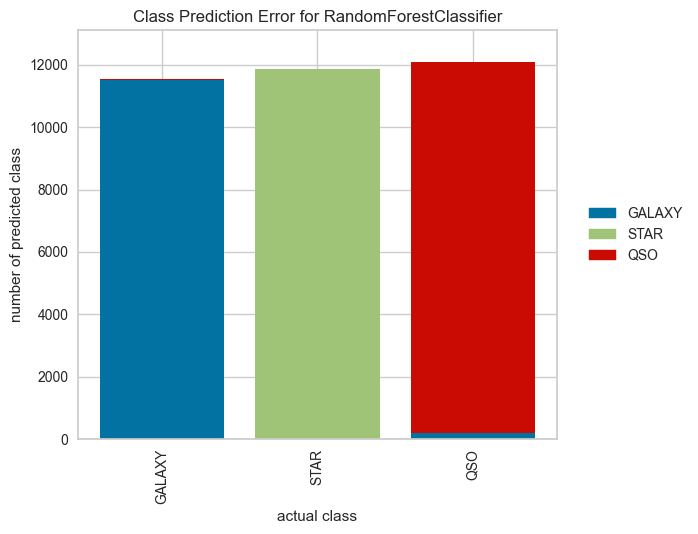

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [29]:
pred_error = ClassPredictionError(rfc, classes=["GALAXY", "STAR", "QSO"])
pred_error.fit(X_train, y_train)
pred_error.score(X_test, y_test)
pred_error.show()